In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from translate import Translator
import re
from unicodedata import normalize
import string

# Lectura de los datos

Para poder realizar comparaciones entre el dataset creado y el de Kaggle decidimos dividirlo en archivos de unos 700 comentarios. ification
$ split -C 700 --numeric-suffixes train.csv train_split

In [23]:
path_train="../../jigsaw-unintended-bias-in-toxicity-classification/train_split01.csv"
df_train = pd.read_csv(path_train)

In [3]:
# Selección de las columnas de interes
df_train_samp=df_train[['target', 'comment_text']]

## Análisis vaderSentiment 

In [4]:
# CReamos el analizador de sentimientos de Vader
analyser = SentimentIntensityAnalyzer()    

En este módulo se comprueba algunas de las frases que fueron etiquetadas de forma incorrecta en Vader. Se quiere comprobar como hubieran sido evaluadas por el modelo de Vader

In [25]:
#Analizamos cada uno de los comentarios añadiendo una columna con los resultados
df_train_samp['neg_vader']=df_train_samp.loc[:,'comment_text'].map(lambda txt: str(analyser.polarity_scores(txt)['neg']) )

In [6]:
df_train_samp.neg_vader=df_train_samp.neg_vader.astype(float).round().astype(int)
df_train_samp.target=df_train_samp.target.astype(float).round().astype(int)

C:\Users\Esperanza\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [8]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(df_train_samp.target, df_train_samp.neg_vader)
cm

array([[369,   3],
       [ 14,   1]], dtype=int64)

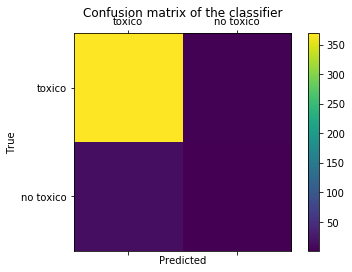

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
labels = ['toxico', 'no toxico']
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#fuente: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

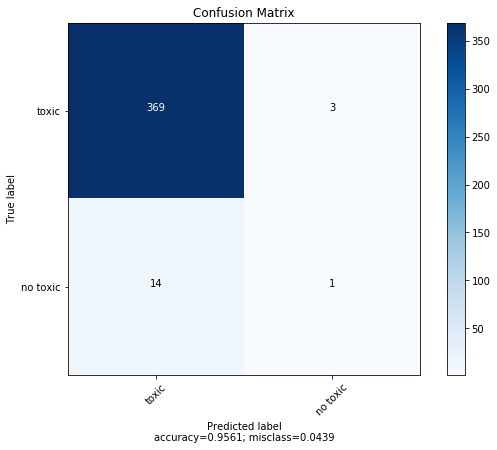

In [18]:
plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names = ['toxic', 'no toxic'],
                      title        = "Confusion Matrix")